In [2]:
import pandas as pd
from datetime import datetime

extended_fact_df = pd.read_csv('extended_fact.csv')

In [8]:
import pandas as pd
from datetime import datetime

# Convert 'Date' to datetime format if it isn't already
extended_fact_df['Date'] = pd.to_datetime(extended_fact_df['Date'])

# Define "today's" date (e.g., the date when the analysis is done)
today_date = datetime.today()

# Step 1: Calculate Recency
# Find the last purchase date for each customer and calculate the difference from today's date
recency_df = extended_fact_df.groupby('CustomerID')['Date'].max().reset_index()
recency_df['Recency'] = (today_date - recency_df['Date']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]

# Step 2: Calculate Frequency
# Count the number of transactions for each customer
frequency_df = extended_fact_df.groupby('CustomerID').size().reset_index(name='Frequency')

# Step 3: Calculate Monetary
# Sum the transaction amounts for each customer
monetary_df = extended_fact_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_df.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)

# Step 4: Merge all three metrics into a single RFM DataFrame
df_rfm = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Display the resulting RFM table
print(df_rfm.head())


   CustomerID  Recency  Frequency  Monetary
0           1      305        310  42372.58
1           2      305        361  50447.99
2           3      304        325  40841.11
3           4      305        302  42793.31
4           5      303        285  40511.32


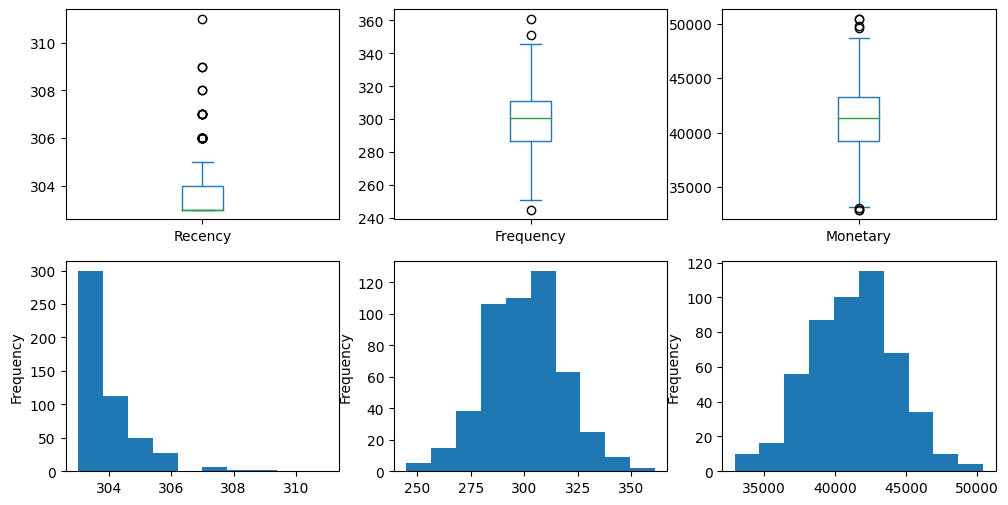

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2, 3, i + 1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2, 3, i + 4)
    df_rfm[feature].plot(kind='hist')
plt.show()

In [10]:
df_rfm = df_rfm[(df_rfm['Frequency'] < 60) & (df_rfm['Monetary'] < 40000)]

In [11]:
import numpy as np

df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary'] - df_rfm['Monetary'].min() + 1)

In [13]:
import numpy as np

df_rfm_log_trans = rfm_df.copy()
df_rfm_log_trans['Recency'] = np.log(df_rfm_log_trans['Recency'] + 1)  # Adding 1 to avoid log(0)
df_rfm_log_trans['Frequency'] = np.log(df_rfm_log_trans['Frequency'] + 1)
df_rfm_log_trans['Monetary'] = np.log(df_rfm_log_trans['Monetary'] + 1)
print("Log-transformed RFM DataFrame:", df_rfm_log_trans.head())

Log-transformed RFM DataFrame:    CustomerID   Recency  Frequency   Monetary
0           1  5.723585   5.739793  10.654280
1           2  5.723585   5.891644  10.828718
2           3  5.720312   5.786897  10.617469
3           4  5.723585   5.713733  10.664160
4           5  5.717028   5.655992  10.609361


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
print("Scaled RFM DataFrame:", df_rfm_scaled.head())

Scaled RFM DataFrame:     Recency  Frequency  Monetary
0  1.189544   0.572795  0.394243
1  1.189544   3.094716  2.716214
2  0.276342   1.355098 -0.095760
3  1.189544   0.139993  0.525758
4 -0.639860  -0.818960 -0.203681


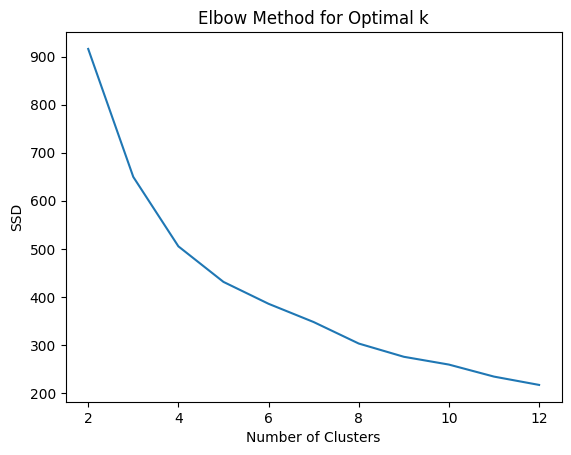

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []
range_n_clusters = range(2, 13)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100, random_state=42)
    kmeans.fit(df_rfm_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.title("Elbow Method for Optimal k")
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100, random_state=42)
    kmeans.fit(df_rfm_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print(f"For n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.3607920145141536
For n_clusters = 3, the silhouette score is 0.3866093337530317
For n_clusters = 4, the silhouette score is 0.32750447394752946
For n_clusters = 5, the silhouette score is 0.3238186120425949
For n_clusters = 6, the silhouette score is 0.31270348330605446
For n_clusters = 7, the silhouette score is 0.31938146423730235
For n_clusters = 8, the silhouette score is 0.3047587723925564
For n_clusters = 9, the silhouette score is 0.30433985548153863
For n_clusters = 10, the silhouette score is 0.29857178597691447
For n_clusters = 11, the silhouette score is 0.3133153221914648
For n_clusters = 12, the silhouette score is 0.3218683725719006


In [24]:
import pandas as pd
from datetime import datetime

# Assuming extended_fact_df is already loaded and contains 'CustomerID', 'Date', 'TotalAmount'
extended_fact_df['Date'] = pd.to_datetime(extended_fact_df['Date'])
today_date = datetime.today()

# Step 1: Calculate Recency
recency_df = extended_fact_df.groupby('CustomerID')['Date'].max().reset_index()
recency_df['Recency'] = (today_date - recency_df['Date']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]

# Step 2: Calculate Frequency
frequency_df = extended_fact_df.groupby('CustomerID').size().reset_index(name='Frequency')

# Step 3: Calculate Monetary
monetary_df = extended_fact_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_df.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)

# Merge RFM data
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Check if Recency, Frequency, and Monetary are populated
print("RFM DataFrame after recalculating metrics:", rfm_df.head())

RFM DataFrame after recalculating metrics:    CustomerID  Recency  Frequency  Monetary
0           1      305        310  42372.58
1           2      305        361  50447.99
2           3      304        325  40841.11
3           4      305        302  42793.31
4           5      303        285  40511.32


In [26]:
# Assuming the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(df_rfm_scaled)
rfm_df['Cluster_Id'] = kmeans.labels_

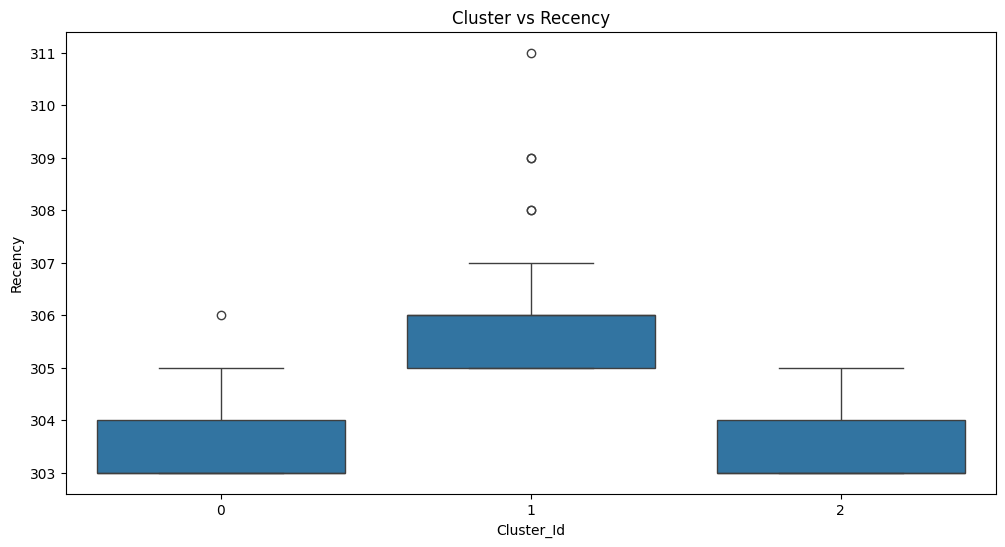

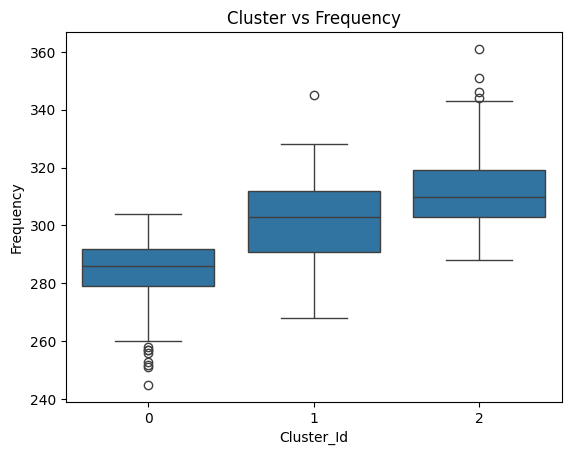

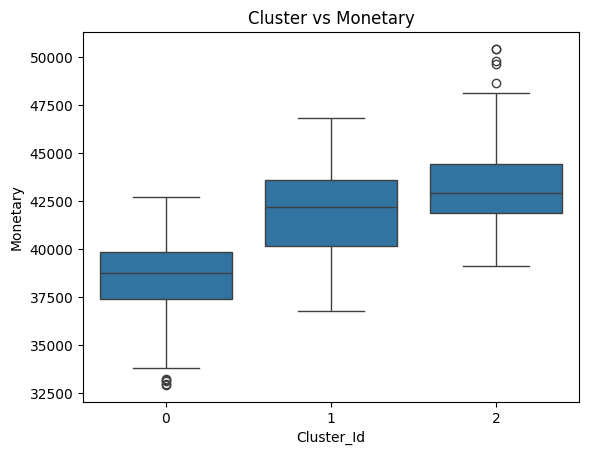

In [28]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)
plt.title("Cluster vs Recency")
plt.show()

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)
plt.title("Cluster vs Frequency")
plt.show()

sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)
plt.title("Cluster vs Monetary")
plt.show()

In [29]:
with pd.ExcelWriter('Output.xlsx') as writer:
    rfm_df.to_excel(writer, sheet_name='rfm_data', index=False)
    pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'inertia']).to_excel(writer, sheet_name='inertia', index=False)

In [30]:
# Calculate mean and median of RFM metrics by Cluster_Id
cluster_summary = rfm_df.groupby('Cluster_Id').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}).reset_index()

# Display cluster summary
print(cluster_summary)

  Cluster_Id     Recency          Frequency             Monetary           
                    mean median        mean median          mean     median
0          0  303.388601  303.0  283.974093  286.0  38464.166839  38736.130
1          1  305.842857  306.0  302.271429  303.0  41923.675286  42220.055
2          2  303.320675  303.0  312.379747  310.0  43322.667637  42943.860


In [31]:
# Create a DataFrame for interpretation
inferences = pd.DataFrame({
    'Cluster_Id': [0, 1, 2],
    'Description': [
        "Less frequent buyers, low spending, haven't purchased recently - least valuable",
        "Moderate frequency, recency, and spending - moderately valuable",
        "Frequent buyers, high spending, recent purchases - most valuable"
    ]
})

# Save to an Excel file
with pd.ExcelWriter('Customer_Segmentation_Output.xlsx') as writer:
    rfm_df.to_excel(writer, sheet_name='rfm_data', index=False)
    pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'inertia']).to_excel(writer, sheet_name='inertia', index=False)
    inferences.to_excel(writer, sheet_name='Cluster_Interpretations', index=False)